In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lesson 17: Comparing Distributions

## Mendel and Pea Flowers ##

In [2]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [9]:
predicted_proportions = make_array(.75, .25)

In [10]:
sample_proportions(929, predicted_proportions)

array([ 0.7212056,  0.2787944])

In [11]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [12]:
purple_flowers()

72.44348762109796

In [13]:
purples = make_array()
trials = 10000

for i in np.arange(trials):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

In [14]:
purples

array([ 74.91926803,  75.88805167,  72.22820237, ...,  75.02691066,
        74.59634015,  72.7664155 ])

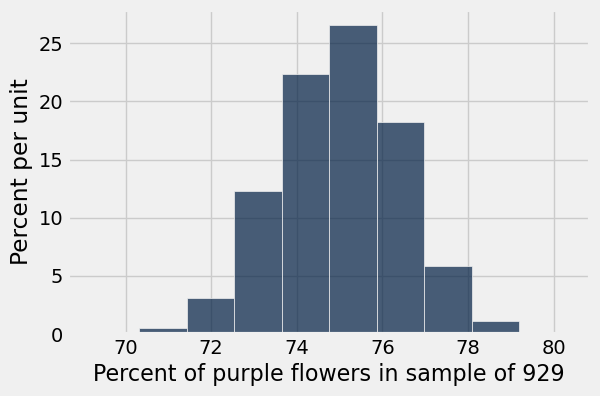

In [15]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

In [16]:
statistics = abs( purples - 75 )

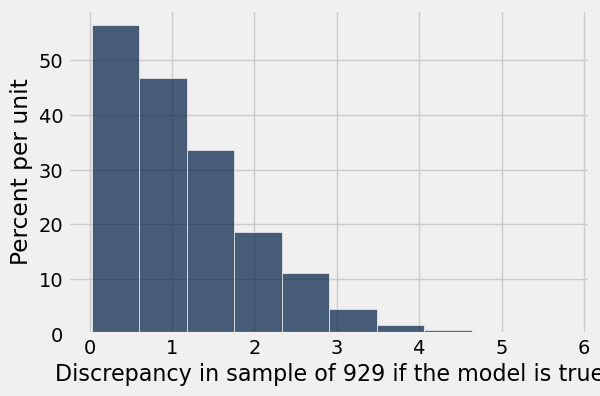

In [17]:
Table().with_column('Discrepancy in sample of 929 if the model is true', statistics).hist()

In [18]:
abs(observed_purples * 100 - 75)

1.318622174381062

## Alameda County Jury Panels ##

In [19]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


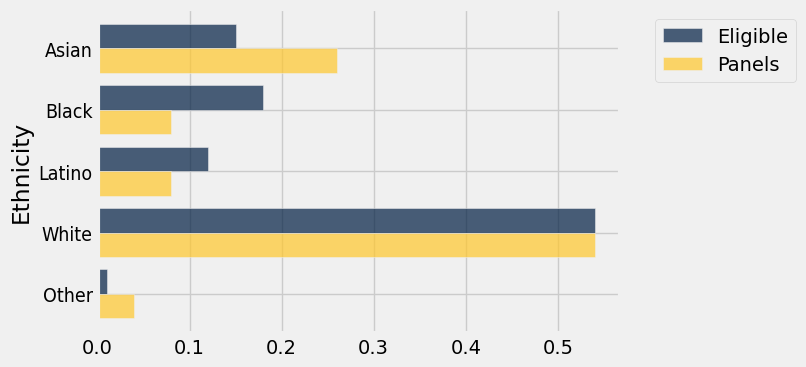

In [20]:
jury.barh('Ethnicity')

In [21]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [22]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated

array([ 0.14406184,  0.19817287,  0.11454673,  0.52986648,  0.01335207])

In [23]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.144062
Black,0.18,0.08,0.198173
Latino,0.12,0.08,0.114547
White,0.54,0.54,0.529866
Other,0.01,0.04,0.0133521


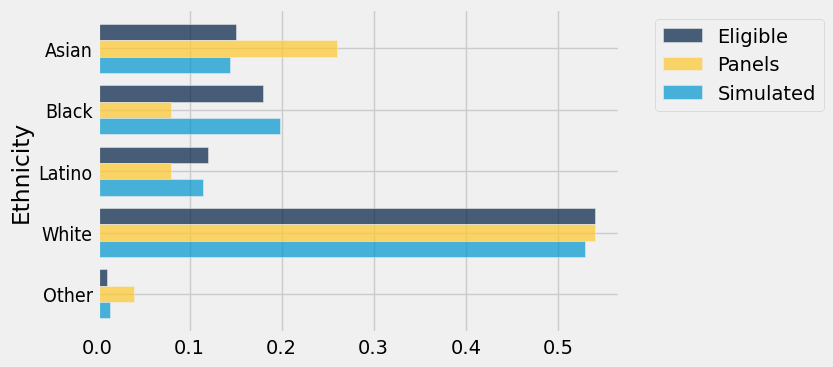

In [24]:
jury_with_simulated.barh('Ethnicity')

## Distance Between Distributions

In [25]:
# In the last lecture, the difference between observed black/purple
# and their expected values (26%/75%) was our statistic.
#
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


## Total Variation Distance

In [26]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [27]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14000000000000001

In [28]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.010632466619817286

In [29]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

In [30]:
len(tvds)

10000

Observed TVD: 0.14


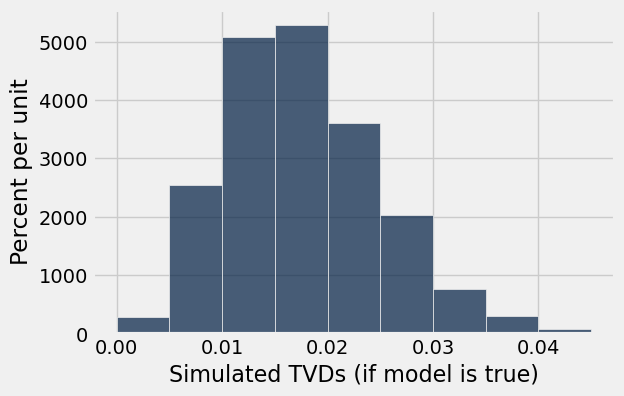

In [31]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))